# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [1]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
# import warnings
# warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.  `'Switzerland17'` should be `'Switzerland'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [3]:
# Reading the excel file and initial cleaning
# Remove header, footer, nan values, and unit
cols = [2, 3,4,5,6]
Energy = pd.read_excel('Energy Indicators.xls',skiprows=16,na_values='...',usecols=cols)
Energy = Energy[:228]
Energy = Energy.drop(0,axis=0)
Energy = Energy.rename(columns={'Unnamed: 2':'Country',
                   'Energy Supply':'Energy Supply',
                   'Energy Supply per capita':'Energy Supply per capita',
                  'Renewable Electricity Production':'% Renewable'})
Energy.head()

,Country,Energy Supply,Energy Supply per capita,% Renewable
1,Afghanistan,321,10,78.6693
2,Albania,102,35,100
3,Algeria,1959,51,0.55101
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9,121,88.6957


In [4]:
# Convert 1,000,000 gigajoules in a petajoule
Energy['Energy Supply'] = Energy['Energy Supply']*1000000
Energy.head()

,Country,Energy Supply,Energy Supply per capita,% Renewable
1,Afghanistan,321000000,10,78.6693
2,Albania,102000000,35,100
3,Algeria,1959000000,51,0.55101
4,American Samoa,NaN,NaN,0.641026
5,Andorra,9000000,121,88.6957


In [5]:
import re

pattern1 = "([\w ]*) \(" # works
pattern2 = '[0-9]' # numbers

# remove paranthesis and numbers from the country names
def hasnum(string):
    return any(char.isdigit() for char in string)
def haspara(string):
    return any(char == '(' for char in string)


for i,a in Energy['Country'].items():
    if haspara(a):
        regexresult = re.findall(pattern1,a)
        Energy.at[i,'Country'] = regexresult[0]
    if hasnum(a):
        regexresultx = re.sub(pattern2,'',a)
        Energy.at[i,'Country'] = regexresultx

In [6]:
# "Republic of Korea": "South Korea",
# "United States of America": "United States",
# "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
# "China, Hong Kong Special Administrative Region": "Hong Kong"
Energy['Country'] = Energy['Country'].replace(['Republic of Korea'],'South Korea')
Energy['Country'] = Energy['Country'].replace(['United States of America'],'United States')
Energy['Country'] = Energy['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'United Kingdom')
Energy['Country'] = Energy['Country'].replace(['China, Hong Kong Special Administrative Region'],'Hong Kong')
# df = df.set_index('Country')

# GDP

In [7]:
GDP = pd.read_csv('world_bank.csv',skiprows=4)
GDP = GDP.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
GDP = GDP.rename(columns={'Country Name':'Country'})


# rename
# "Korea, Rep.": "South Korea", 
# "Iran, Islamic Rep.": "Iran",
# "Hong Kong SAR, China": "Hong Kong"

GDP['Country'] = GDP['Country'].replace(['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],['South Korea','Iran','Hong Kong'])

GDP = GDP.set_index('Country')
GDP.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


# Sciamgo Journal


In [8]:
import xlrd
xlrd.__VERSION__

'1.2.0'

In [13]:
ScimEn = pd.read_excel('scimagojr-3.xlsx')
ScimEn = ScimEn.set_index('Country')
ScimEn.head()


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,
China,1,127050,126767,597237,411683,4.70,138
United States,2,96661,94747,792274,265436,8.20,230
Japan,3,30504,30287,223024,61554,7.31,134
United Kingdom,4,20944,20357,206091,37874,9.84,139
Russian Federation,5,18534,18301,34266,12422,1.85,57


# Merge

In [16]:
Energy = Energy.set_index('Country')
Energy.head()

,Energy Supply,Energy Supply per capita,% Renewable
Country,,,
Afghanistan,321000000,10,78.6693
Albania,102000000,35,100
Algeria,1959000000,51,0.55101
American Samoa,NaN,NaN,0.641026
Andorra,9000000,121,88.6957


In [17]:
GDP.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10


In [22]:
temp = pd.merge(GDP,Energy,how='inner',left_index=True,right_index=True)
mergex = pd.merge(temp,ScimEn,how='inner',left_index=True,right_index=True)
mergex.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,Energy Supply,Energy Supply per capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,,
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9000000,121,88.6957,168,2,2,13,0,6.50,1
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,321000000,10,78.6693,163,3,3,0,0,0.00,0
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,642000000,27,70.9091,99,50,50,79,0,1.58,5
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,102000000,35,100,118,23,23,168,14,7.30,6
United Arab Emirates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2710000000,300,0,43,1137,1124,6055,611,5.33,37


In [29]:
mergex.columns

Index(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', 'Energy Supply', 'Energy Supply per capita',
       '% Renewable', 'Rank', 'Documents', 'Citable documents', 'Citations',
       'Self-citations', 'Citations per document', 'H index'],
      dtype='object')

In [30]:
# Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 
#'Rank' (Rank 1 through 15).

temp_years_to_drop = list(range(1960,2006))
years_to_drop = []
for year in temp_years_to_drop:
    years_to_drop.append(str(year))
mergex = mergex.drop(years_to_drop,axis=1)
mergex

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Energy Supply,Energy Supply per capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,
Andorra,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN,9000000,121,88.6957,168,2,2,13,0,6.50,1
Afghanistan,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10,321000000,10,78.6693,163,3,3,0,0,0.00,0
Angola,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11,642000000,27,70.9091,99,50,50,79,0,1.58,5
Albania,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10,102000000,35,100,118,23,23,168,14,7.30,6
United Arab Emirates,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11,2710000000,300,0,43,1137,1124,6055,611,5.33,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,2.798925e+10,3.076611e+10,3.353506e+10,3.625140e+10,3.933277e+10,4.259739e+10,4.609038e+10,4.977761e+10,5.380959e+10,5.811436e+10,1798000000,62,21.3284,96,57,56,158,45,2.77,7
Samoa,6.393881e+08,6.798143e+08,6.866743e+08,6.536571e+08,6.567891e+08,6.947420e+08,6.975356e+08,6.840462e+08,6.922284e+08,7.035448e+08,4000000,22,31.3559,166,3,3,13,1,4.33,1
South Africa,3.402852e+11,3.585261e+11,3.699668e+11,3.642764e+11,3.753494e+11,3.874074e+11,3.960071e+11,4.047682e+11,4.110369e+11,4.163117e+11,6341000000,119,1.68702,34,1928,1913,11924,1996,6.18,46


In [38]:
# top 15 ranks
result = mergex[mergex['Rank']<=15]

# sort by rank
# sort values is depracated
result = result.sort_values(['Rank'])

In [39]:
result

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Energy Supply,Energy Supply per capita,% Renewable,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
Country,,,,,,,,,,,,,,,,,,,,
China,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,127191000000,93,19.7549,1,127050,126767,597237,411683,4.70,138
United States,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,90838000000,286,11.571,2,96661,94747,792274,265436,8.20,230
Japan,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,18984000000,149,10.2328,3,30504,30287,223024,61554,7.31,134
United Kingdom,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,7920000000,124,10.6005,4,20944,20357,206091,37874,9.84,139
Russian Federation,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,30709000000,214,17.2887,5,18534,18301,34266,12422,1.85,57
Canada,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,10431000000,296,61.9454,6,17899,17620,215003,40930,12.01,149
Germany,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,13261000000,165,17.9015,7,17027,16831,140566,27426,8.26,126
India,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,33195000000,26,14.9691,8,15005,14841,128763,37209,8.58,115
France,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,10597000000,166,17.0203,9,13153,12973,130632,28601,9.93,114


In [52]:
result.columns

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', 'Energy Supply', 'Energy Supply per capita', '% Renewable',
       'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index'],
      dtype='object')

In [53]:
# ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 
#  'H index', 'Energy Supply', 'Energy Supply per Capita', 
#  '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
 
col_order = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations','Citations per document', 'H index', 'Energy Supply','Energy Supply per Capita', '% Renewable','2006', '2007', '2008','2009', '2010', '2011', '2012', '2013', '2014', '2015']
col_order
result = result.rename(columns={'Energy Supply per capita':'Energy Supply per Capita'})
result = result[col_order]

In [54]:
result.columns == col_order

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Testing below

In [181]:
# check before values
# print(df.iloc[24]['Country'])
# print(df.iloc[25]['Country'])

# print(df.iloc[70]['Country'])
# print(df.iloc[71]['Country'])

# print(df.iloc[98]['Country'])
# print(df.iloc[99]['Country'])


# print(df.iloc[42]['Country'])
# print(df.iloc[43]['Country'])

# print(df.iloc[11]['Country'])
# print(df.iloc[12]['Country'])


In [178]:
# do stuff

# for i,a in df['Country'].items():
#     if haspara(a):
#         print(i,a,)
#         regexresult = re.findall(pattern1,a)
#         print(regexresult[0])
#         df.at[i,'Country'] = regexresult[0]
#     if hasnum(a):
#         print(i,a,)
#         regexresultx = re.sub(pattern2,'',a)
#         print(regexresultx)
#         df.at[i,'Country'] = regexresultx
    

In [179]:
# to prove it worked on the right index
# print(df.iloc[24]['Country'])
# print(df.iloc[25]['Country'])

# print(df.iloc[70]['Country'])
# print(df.iloc[71]['Country'])

# print(df.iloc[98]['Country'])
# print(df.iloc[99]['Country'])


# print(df.iloc[42]['Country'])
# print(df.iloc[43]['Country'])

# print(df.iloc[11]['Country'])
# print(df.iloc[12]['Country'])

In [180]:
# checking here
# import re
# # Modify several countries with numbers and/or parenthesis in their name
# a = 'Bolivia Sana Jose (Plurinational State of)'
# b = 'Switzerland17'

# # paranthesis
# pattern1 = "([\w ]*) \(" # works
# for t in z:
#     print(re.findall(pattern1,t))

    
# # number
# pattern2 = '[0-9]'
# for t in z:
#     print(re.sub(pattern2,'',t))

# End Testing

# Result

In [40]:
import re
# remove paranthesis and numbers from the country names
def hasnum(string):
    return any(char.isdigit() for char in string)
def haspara(string):
    return any(char == '(' for char in string)

In [55]:
def answer_one():
    # Reading the excel file and initial cleaning
    # Remove header, footer, nan values, and unit
    cols = [2, 3,4,5,6]
    Energy = pd.read_excel('Energy Indicators.xls',skiprows=16,na_values='...',usecols=cols)
    GDP = pd.read_csv('world_bank.csv',skiprows=4)
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    Energy = Energy[:228]
    Energy = Energy.drop(0,axis=0)
    Energy = Energy.rename(columns={'Unnamed: 2':'Country',
                       'Energy Supply':'Energy Supply',
                       'Energy Supply per capita':'Energy Supply per capita',
                      'Renewable Electricity Production':'% Renewable'})
    # Convert 1,000,000 gigajoules in a petajoule
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    
    pattern1 = "([\w ]*) \(" # works
    pattern2 = '[0-9]' # numbers

    for i,a in Energy['Country'].items():
        if haspara(a):
            regexresult = re.findall(pattern1,a)
            Energy.at[i,'Country'] = regexresult[0]
        if hasnum(a):
            regexresultx = re.sub(pattern2,'',a)
            Energy.at[i,'Country'] = regexresultx
    # "Republic of Korea": "South Korea",
    # "United States of America": "United States",
    # "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    # "China, Hong Kong Special Administrative Region": "Hong Kong"
    Energy['Country'] = Energy['Country'].replace(['Republic of Korea'],'South Korea')
    Energy['Country'] = Energy['Country'].replace(['United States of America'],'United States')
    Energy['Country'] = Energy['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'United Kingdom')
    Energy['Country'] = Energy['Country'].replace(['China, Hong Kong Special Administrative Region'],'Hong Kong')
    Energy = Energy.set_index('Country')
    
    
    # GDP
    GDP = GDP.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
    GDP = GDP.rename(columns={'Country Name':'Country'})

    # rename
    # "Korea, Rep.": "South Korea", 
    # "Iran, Islamic Rep.": "Iran",
    # "Hong Kong SAR, China": "Hong Kong"

    GDP['Country'] = GDP['Country'].replace(['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],['South Korea','Iran','Hong Kong'])

    GDP = GDP.set_index('Country')
    
    # SCIMEN
    ScimEn = ScimEn.set_index('Country')
    
    temp = pd.merge(GDP,Energy,how='inner',left_index=True,right_index=True)
    mergex = pd.merge(temp,ScimEn,how='inner',left_index=True,right_index=True)
    
    # Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 
    #'Rank' (Rank 1 through 15).

    temp_years_to_drop = list(range(1960,2006))
    years_to_drop = []
    for year in temp_years_to_drop:
        years_to_drop.append(str(year))
    mergex = mergex.drop(years_to_drop,axis=1)
    
    # top 15 ranks
    result = mergex[mergex['Rank']<=15]

    # sort by rank
    # sort values is depracated
    result = result.sort_values(['Rank'])
    col_order = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations','Citations per document', 'H index', 'Energy Supply','Energy Supply per Capita', '% Renewable','2006', '2007', '2008','2009', '2010', '2011', '2012', '2013', '2014', '2015']
    
    result = result.rename(columns={'Energy Supply per capita':'Energy Supply per Capita'})
    result = result[col_order]
    
    return result

In [57]:
answer_one().head()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.7549,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.571,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.2328,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.6005,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.2887,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12


In [58]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [ ]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [59]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [62]:
def answer_two():
    cols = [2, 3,4,5,6]
    Energy = pd.read_excel('Energy Indicators.xls',skiprows=16,na_values='...',usecols=cols)
    GDP = pd.read_csv('world_bank.csv',skiprows=4)
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    
    Energy = Energy[:228]
    Energy = Energy.drop(0,axis=0)
    Energy = Energy.rename(columns={'Unnamed: 2':'Country',
                       'Energy Supply':'Energy Supply',
                       'Energy Supply per capita':'Energy Supply per capita',
                      'Renewable Electricity Production':'% Renewable'})
    # Convert 1,000,000 gigajoules in a petajoule
    Energy['Energy Supply'] = Energy['Energy Supply']*1000000
    
    pattern1 = "([\w ]*) \(" # works
    pattern2 = '[0-9]' # numbers

    for i,a in Energy['Country'].items():
        if haspara(a):
            regexresult = re.findall(pattern1,a)
            Energy.at[i,'Country'] = regexresult[0]
        if hasnum(a):
            regexresultx = re.sub(pattern2,'',a)
            Energy.at[i,'Country'] = regexresultx
    # "Republic of Korea": "South Korea",
    # "United States of America": "United States",
    # "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    # "China, Hong Kong Special Administrative Region": "Hong Kong"
    Energy['Country'] = Energy['Country'].replace(['Republic of Korea'],'South Korea')
    Energy['Country'] = Energy['Country'].replace(['United States of America'],'United States')
    Energy['Country'] = Energy['Country'].replace(['United Kingdom of Great Britain and Northern Ireland'],'United Kingdom')
    Energy['Country'] = Energy['Country'].replace(['China, Hong Kong Special Administrative Region'],'Hong Kong')
    Energy = Energy.set_index('Country')
    
    
    # GDP
    GDP = GDP.drop(['Country Code','Indicator Name','Indicator Code'],axis=1)
    GDP = GDP.rename(columns={'Country Name':'Country'})

    # rename
    # "Korea, Rep.": "South Korea", 
    # "Iran, Islamic Rep.": "Iran",
    # "Hong Kong SAR, China": "Hong Kong"

    GDP['Country'] = GDP['Country'].replace(['Korea, Rep.','Iran, Islamic Rep.','Hong Kong SAR, China'],['South Korea','Iran','Hong Kong'])

    GDP = GDP.set_index('Country')
    
    # SCIMEN
    ScimEn = ScimEn.set_index('Country')
    
    temp1 = pd.merge(GDP,Energy,how='outer',left_index=True,right_index=True)
    union_result = pd.merge(temp1,ScimEn,how='outer',left_index=True,right_index=True)
    
    
    temp2 = pd.merge(GDP,Energy,how='inner',left_index=True,right_index=True)
    intersection_result = pd.merge(temp2,ScimEn,how='inner',left_index=True,right_index=True)
    
    
    result_int = union_result.shape[0]-intersection_result.shape[0]

    return result_int
    


In [63]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [77]:
def answer_three():
    result = answer_one()
    temp_years_mean = list(range(2006,2016))
    years_mean = []
    for year in temp_years_mean:
        years_mean.append(str(year))
    years_mean
    thisresult = result[years_mean].mean(axis=1)
    
    thisresult.sort_values(ascending=False,inplace=True)
    
    return thisresult
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [71]:
# type(temp[years_mean].mean(axis=1))

pandas.core.series.Series

In [74]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [97]:
def answer_four():
    result = answer_one()
    result = result.sort_values(['2015'],ascending=False)
    return result.iloc[5]['2015']-result.iloc[5]['2006']

answer_four()

246702696075.3999

In [86]:
1792608764608.81 - 1564468853329.45

228139911279.3601

In [ ]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [101]:
def answer_five():
    result = answer_one()
    return np.mean(result['Energy Supply per Capita'])
answer_five()

157.6

In [98]:
result = answer_one()
result

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93,19.7549,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286,11.571,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149,10.2328,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124,10.6005,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214,17.2887,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296,61.9454,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165,17.9015,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26,14.9691,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166,17.0203,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [ ]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [108]:
def answer_six():
    result = answer_one()
    maxpercent = np.max(result['% Renewable'])
    return (result[result['% Renewable']== maxpercent].index[0],maxpercent)
answer_six()

('Brazil', 69.64803)

In [109]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [113]:
def answer_seven():
    result = answer_one()
    result['ratio'] = result['Self-citations']/result['Citations']
    maxval = np.max(result['ratio'])
    return (result[result['ratio'] == maxval].index[0],maxval)

answer_seven()

('China', 0.6893126179389422)

In [114]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [125]:
def answer_eight():
    result = answer_one()
    result['Population'] = result['Energy Supply']/result['Energy Supply per Capita']
    result = result.sort_values('Population',ascending=False)
    return result.iloc[2].name
answer_eight()

'United States'

In [ ]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [141]:
def answer_nine():
    result = answer_one()
    result['Population'] = result['Energy Supply']/result['Energy Supply per Capita']
    result['Citable docs per Capita'] = result['Citable documents']/result['Population']
    result['Energy Supply per Capita'] = pd.to_numeric(result['Energy Supply per Capita'])
    result['Citable docs per Capita'] = pd.to_numeric(result['Citable docs per Capita'])
    return result['Citable docs per Capita'].corr(result['Energy Supply per Capita'])
answer_nine()

0.7940010435442946

In [144]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

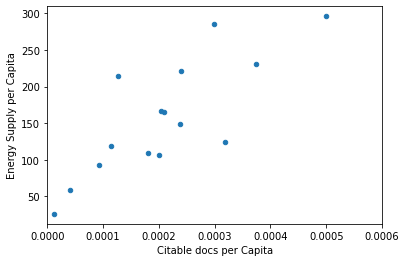

In [145]:
plot9()

In [146]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [152]:
def answer_ten():
    result = answer_one()
    median = np.median(result['% Renewable'])
    result['HighRenew'] = np.where(result['% Renewable']>=median, 1,0)
    return result['HighRenew']
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

In [153]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [198]:
def answer_eleven():
    con  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    Continent = pd.DataFrame(con.items(),columns=['Country','Continent'])
    Continent = Continent.set_index('Country')
    result = answer_one()
    result['Population'] = result['Energy Supply']/result['Energy Supply per Capita']
    
    result = result.merge(Continent, how='inner',left_index=True,right_index=True)
#     df.groupby('Continent').agg({'review_scores_value':(np.nanmean,np.nanstd), 'reviews_per_month':np.nanmean})
    
    dflist = []
    
    for group, frame in result.groupby('Continent'):
        dic = {'Continent':group,
           'size':len(frame),
           'sum':np.sum(frame['Population']),
               'mean':np.mean(frame['Population']),
           'std':np.std(frame['Population'],ddof=1)}
        dflist.append(dic)
    resultx = pd.DataFrame(dflist)
    resultx = resultx.set_index('Continent')
    
#     resultx['sum'] = pd.to_numeric(resultx['size'])
#     resultx['sum'] = pd.to_numeric(resultx['sum'])
#     resultx['sum'] = pd.to_numeric(resultx['mean'])
#     resultx['sum'] = pd.to_numeric(resultx['std'])
    return resultx


res = answer_eleven()
res

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [199]:
float(res[res.index == 'Asia']['std'])

679097888.3660954

In [197]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [245]:
def answer_twelve():
    con  = {'China':'Asia', 
              'United States':'North America', 
              'Japan':'Asia', 
              'United Kingdom':'Europe', 
              'Russian Federation':'Europe', 
              'Canada':'North America', 
              'Germany':'Europe', 
              'India':'Asia',
              'France':'Europe', 
              'South Korea':'Asia', 
              'Italy':'Europe', 
              'Spain':'Europe', 
              'Iran':'Asia',
              'Australia':'Australia', 
              'Brazil':'South America'}
    Continent = pd.DataFrame(con.items(),columns=['Country','Continent'])
    Continent = Continent.set_index('Country')
    result = answer_one()
    result['Population'] = result['Energy Supply']/result['Energy Supply per Capita']

    result = result.merge(Continent, how='inner',left_index=True,right_index=True)
    x = pd.cut(result['% Renewable'],5)
    result['% Renewable'] = x
    result = result.set_index(['Continent','% Renewable'])
    ser = result.groupby(level=['Continent','% Renewable']).size()
    ser = ser[ser > 0]
    
    return ser

answer_twelve()


Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [246]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [291]:
def addcomma(num):
    arr = num.split('.')
    beforedec = arr[0]
    afterdec = arr[1]
    i=len(beforedec)-1
    count = 0
    final_num = ''
    while i>=0:
        if count!= 0 and count%3 == 0:
            final_num = final_num +','
        count+=1
        final_num = final_num +beforedec[i]
        i-=1
    # print(num,'----',final_num[::-1]+'.'+afterdec)
    final = final_num[::-1]+'.'+afterdec
    return final

def answer_thirteen():
    result = answer_one()
    result['Population'] = result['Energy Supply']/result['Energy Supply per Capita']
    result['Population'] = result['Population'].astype(str)
    ser = result['Population']
    ser = ser.apply(addcomma)
    return ser
answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Population, dtype: object

In [292]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [ ]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")